In [ ]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
titanic = pd.read_csv('train.csv')

In [ ]:
cluster_data = titanic[['Fare','Age']].copy(deep=True)
cluster_data.dropna(axis=0, inplace=True)
cluster_data.sort_values(by=['Fare','Age'], inplace=True)
cluster_array = np.array(cluster_data)

In [ ]:
cluster_data.head()

,Fare,Age
302,0.0,19.0
271,0.0,25.0
179,0.0,36.0
822,0.0,38.0
806,0.0,39.0


In [ ]:
print(cluster_array[0:10])

[[ 0.     19.    ]
 [ 0.     25.    ]
 [ 0.     36.    ]
 [ 0.     38.    ]
 [ 0.     39.    ]
 [ 0.     40.    ]
 [ 0.     49.    ]
 [ 4.0125 20.    ]
 [ 5.     33.    ]
 [ 6.2375 61.    ]]


In [ ]:
cluster_array.shape

(714, 2)

In [ ]:
#k = 4
k=0
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
    print(f"idx{idx}\n")
    print(f"centroids\n{centroids}\n")
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
            
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points,distances


In [ ]:
#k = 4
k=0
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
    print(f"idx{idx}\n")
    print(f"centroids\n{centroids}\n")
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
    #Repeating the above steps for a defined number of iterations
    #Step 4
    diff_dist = np.array([3,3])
    print(f"np.sum(diff_dist)\n{np.sum(diff_dist)}\n")

    while (np.sum(diff_dist)>1 or np.sum(diff_dist)<-1):
        up_centroids = []
        diff_dist = []
        flag = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) #[avg x ,avg y ]for each idx
            up_centroids.append(temp_cent)
            #diff_dist = np.subtract(up_centroids,centroids)
        diff_dist = np.subtract(up_centroids,centroids)
        print(f"centroids\n{centroids}\n")
        print(f"up_centroids\n{up_centroids}\n")
        print(f"diff_dist\n{diff_dist.sum(axis=0)}\n")
        centroids = up_centroids
        up_centroids = np.vstack(up_centroids) #Updated Centroids 
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points,distances


In [ ]:
label,distances = kmeans(cluster_array,k+2,2)

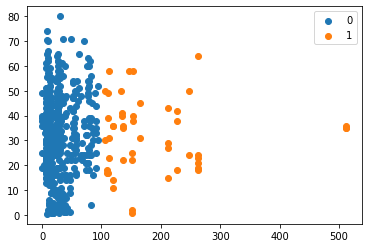

In [ ]:
#label,distances = kmeans(cluster_array,2,2)
 
#Visualize the results
 
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(cluster_array[label == i , 0] , cluster_array[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
SSE = []
for k in range(1,10):   
    label,distances = kmeans(cluster_array,k,10)
    SSE.append(np.sum(pow(distances.min(axis=1),2))/len(cluster_array))

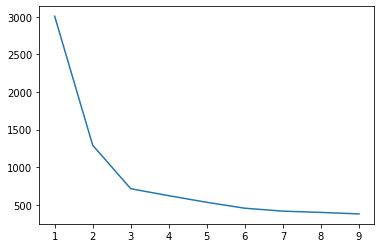

In [ ]:
k = range(1,10)
plt.plot(k,SSE)